In [1]:
from devito import * 

In [4]:
N=1000# no. of points on X axis4
L=1# extent of x axis
c=1
grid =Grid(shape=(N),extent=(L))
grid1 =Grid(shape=(N),extent=(L))
dx=L/N
dt=dx/5

In [5]:
u=TimeFunction(name="u",grid=grid,space_order=2,time_order=2)
u1=TimeFunction(name="u1",grid=grid1,space_order=2,time_order=2)
#space order 2, not 3 because dx2 in equation and only dx

In [6]:
from numpy import linspace
x=linspace(0,L,N)#x axis


In [7]:
def g(x):
    return x**2*(x-1)
def h(x):
    return np.zeros(shape=np.size(x))


In [8]:
import numpy as np
#initial condition:  u.dt at t=0 is 0 so u(0,x)=u(dt,x)
t_s=grid.stepping_dim
u.data[0,:]= g(x)
u.data[1,:]=g(x)#=+h(x)*dt #g(x)+h(x)*dt
np.shape(u.data)
print(u.data)

[[-0.000000e+00 -1.001000e-06 -3.999988e-06 ... -1.993994e-03
  -9.989979e-04  0.000000e+00]
 [-0.000000e+00 -1.001000e-06 -3.999988e-06 ... -1.993994e-03
  -9.989979e-04  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00 ...  0.000000e+00
   0.000000e+00  0.000000e+00]]


In [9]:
#boundary condtions
bc1=[Eq(u[t_s+1,0],u[t_s+1,1])]#u.dx at (0,t)=0
bc2=[Eq(u[t_s+1,-1],u[t_s+1,-2])]

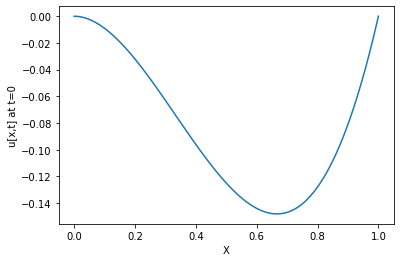

In [10]:
#function at t=0 
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,u.data[0,:])
plt.xlabel("X")
plt.ylabel("u[x,t] at t=0")
plt.show()

In [11]:
pde=(u.dt2)-(c**2)*(u.dx2)
eq=Eq(u.forward,solve(pde,u.forward))
eq

Eq(u(t + dt, x), dt**2*(Derivative(u(t, x), (x, 2)) + 2.0*u(t, x)/dt**2 - u(t - dt, x)/dt**2))

In [12]:
op= Operator([eq]+bc1+bc2)

In [13]:
op.apply(time_m=1,time_M=2400,dt=dt)

Operator `Kernel` ran in 0.01 s


PerformanceSummary([(PerfKey(name='section0', rank=None),
                     PerfEntry(time=0.0007940000000000128, gflopss=0.0, gpointss=0.0, oi=0.0, ops=0, itershapes=[]))])

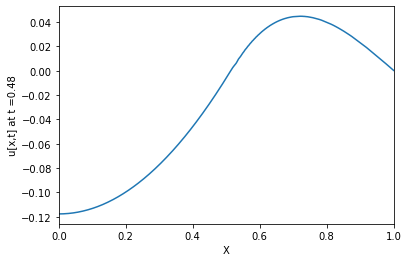

In [14]:
import  matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.linspace(0,1,1000),u.data[0,:])
plt.xlabel("X")
plt.ylabel("u[x,t] at t =0.48")
plt.xlim(0,1)
plt.show()

In [15]:
#exact  answer:

In [16]:
from numpy import *

In [17]:
# function for coefficient of terms
def a(n):
    if n>0: return ((-1)**n)*2*(L**3)/((n**4)*(pi**4))*((n**2)*(pi**2)+6*(1+(-1)**n))
    elif n==0:return -(L**3)/12

In [18]:
 #series summation upto n terms
def sigma(n,x,t) :
    summ=0
    for j in range (0,n+1):
        summ+= a(j)* cos(j*pi*c*t/L)*cos(j*pi*x/L)
    return summ         
    

In [19]:

time=1.2#as time_M =600, so time =time_M*dt=0.06, where dt=dx/10=(L/N)/10=0.0001
num=1000# no of terms in summation formula
u2=zeros(N,dtype=float)# array to store values of function
for i in range(0,N):# fill u2 with value:
    u2[i]=sigma(num,i*dx,time)
    

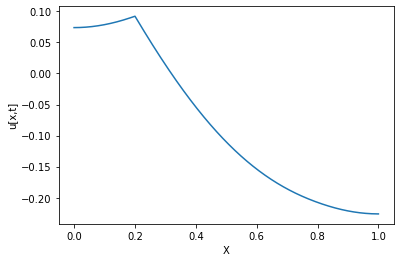

In [20]:
import  matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,u2[:])
plt.xlabel("X")
plt.ylabel("u[x,t]")
plt.show()